In [63]:
import mysql.connector
from PIL import Image
import random
import numpy as np
import os
import math
import time
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [67]:
#CONNECT TO THE SQL DATABASE
mydb = mysql.connector.connect(
  host="us-cdbr-east-06.cleardb.net",
  user="b50281fd4181c6",
  password="12b4a1bb",
  database="heroku_2f2d25ae5fc707a"
)

mycursor = mydb.cursor()

In [68]:
s = "SELECT user_label, SPRITE_HEX FROM sprite_labels WHERE is_unknown = 1 OR user_label is NOT NULL ORDER BY timestamp DESC"

mycursor.execute(s)
labelled_sprites = mycursor.fetchall()
print(len(labelled_sprites))
    

121


In [61]:
# convert hex string to np array
def convert_hex_to_np(hex_string):
    return np.fromiter((int(x, 16) for x in hex_string if x!=''), dtype=np.int32)
        
def showSprPalette(spr,palette=PICO_PALETTE):
    #set the colormap
    colormap = ListedColormap(palette,N=len(palette))
    #show the sprite
    plt.figure(figsize=(2,2))
    plt.axis('off')
    plt.imshow(spr.squeeze(),cmap=colormap,vmin=0,vmax=len(palette)-1)
    plt.show()

Shining star


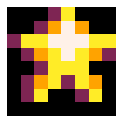

Small blue fish


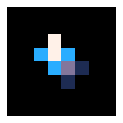

Plaid


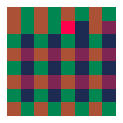

A brown helmet with purple visor


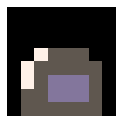

purple plus


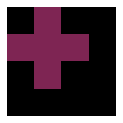

gold coin with pink background


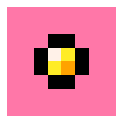

white spaceship


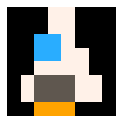

A royal treasure chest


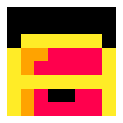

A man in blue overalls with a red hat and brown hair


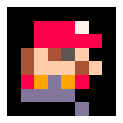

An evil purple creature with horns


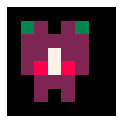

A small yellow coin


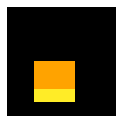

A man in an orange and red jumpsuit with a jetpack


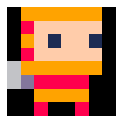

A brown net


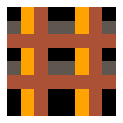

A woman with pink hair and red boots


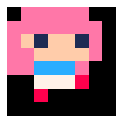

the letter R in white


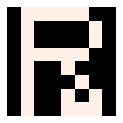

A racer man in blue standing on the side of the screen


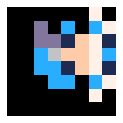

green arrow pointing right


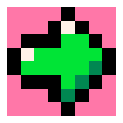

cherry


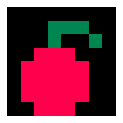

ni


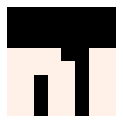

pink and white star


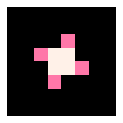

A stone tile


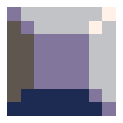

Lowercase letter d


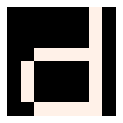

A tan arrow pointing northwest


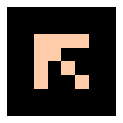

2 rocks


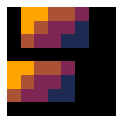

A skull


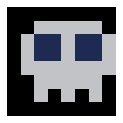

Lowercase y


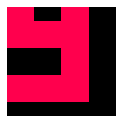

A dark blue tile


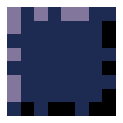

LI


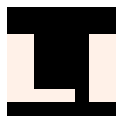

A short red two legged creature


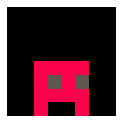

A white vertical rectangle


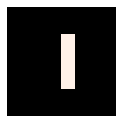

black and grey heart with pink background


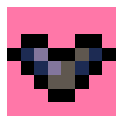

Gem


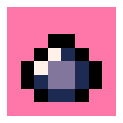

Level of Dave


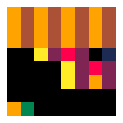

Currency


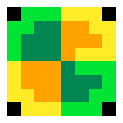

Top view of a level


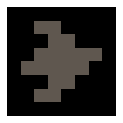

Volcano


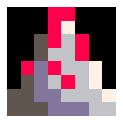

Upside down shrub


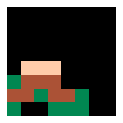

Grandma with umbrella


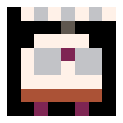

Blue hair


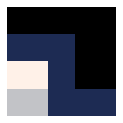

Celeste


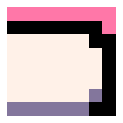

Lawn mowing


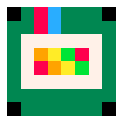

Alcohol bottles


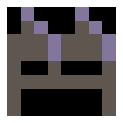

Darkness


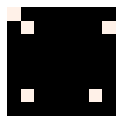

Climbing a tree


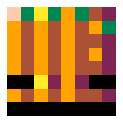

Pink panther


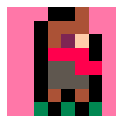

Checkers


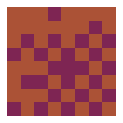

Ocean


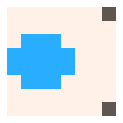

Forrest gump


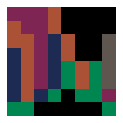

Pikachu


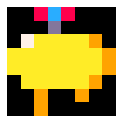

The night king


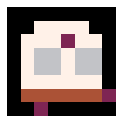

Pacman


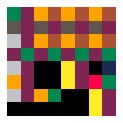

Corner tree


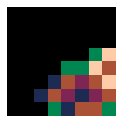

Corner tile


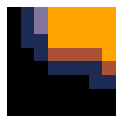

Demon


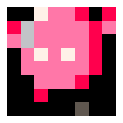

Window


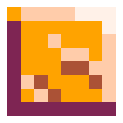

A skull with red eyes


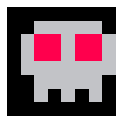

A blue fox or dog beside a human


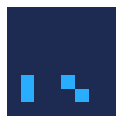

blue colored man in a yellow shirt


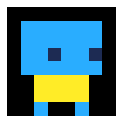

a grey plus


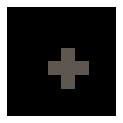

Hollow knight


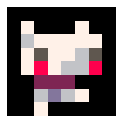

blue pixel in bottom leftmost corner


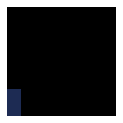

a green parrot in a santa hat


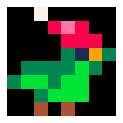

A finger poking down from the top


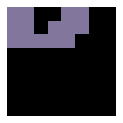

An upside down skull


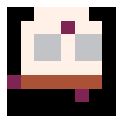

a red haired leprechaun.


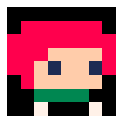

a red and orange coin


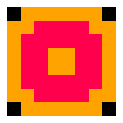

a blue racer guy


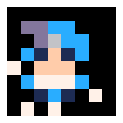

a church


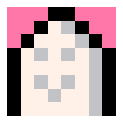

a green tree with green apples


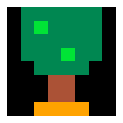

side of a pool


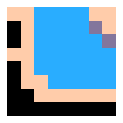

a mummy


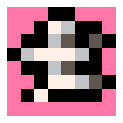

a yellow tile


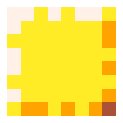

a red gem


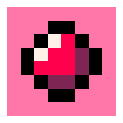

sushi with lots of vegetables


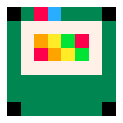

a karate lady with a bow in her hair and orange hair


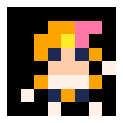

a green spherical blob


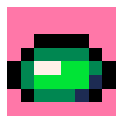

a white creature with glasses and purple feet


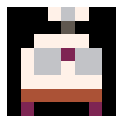

the letter u


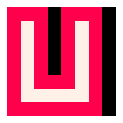

grey creature coming out of a flower


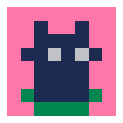

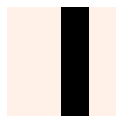

a cherry


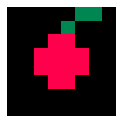

a jester in red, yellow, and blue with brown hair


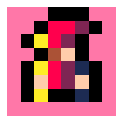

green pixel in top leftmost corner


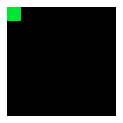

white arrow pointing northwest


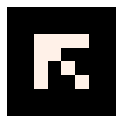

rainbow rock


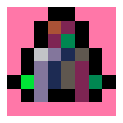

grey turtle with heart ears


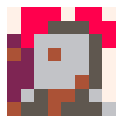

In [62]:
# np.fromiter((int(x, 16) for x in s.split('-')), dtype=np.int32)

for sprite in labelled_sprites:
    if sprite[0] is not None:
        print(sprite[0])
        np_array = convert_hex_to_np(sprite[1])
        showSprPalette(np_array.reshape(8,8))
                            